

```

    Generate artificial classification data.


```



In [2]:
number_of_samples_per_class = 15
number_of_relevant_features = 30 # TODO assert complete number of features?
number_of_pseudo_class_features = 10
number_of_random_features = 200

In [3]:
import numpy as np
from numpy import ndarray
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from statsmodels.stats import correlation_tools

def generate_correlated_cluster(
    number_of_features: int,
    number_of_samples: int,
    lower_bound: float,
    upper_bound: float,
) -> ndarray:
    """Generate a cluster of correlated features.
    Args:
        number_of_features: Number of columns of generated data.
        number_of_samples: Number of rows of generated data.
        lower_bound: Lower bound of the generated correlations.
        upper_bound: Upper bound of the generated correlations.
    Returns:
        Numpy array of the given shape with correlating features in the given range.
    """
    rng = np.random.default_rng()

    # generate random matrix to constrain a range of values
    # and specify a starting point
    random_matrix = np.random.uniform(
        low=lower_bound,
        high=upper_bound,
        size=(number_of_features, number_of_features),
    )

    print("generation of correlation matrix ...")
    # first iteration generating correlations to
    # improve the fit of the covariance matrix
    correlation_matrix = correlation_tools.corr_nearest(corr=random_matrix, threshold=1e-15, n_fact=10000)

    # change values on the diagonal to 1 to
    # improve the fit of the covariance matrix
    for i in range(0, correlation_matrix.shape[0]):
        correlation_matrix[i, i] = 1

    print("generation of covariant matrix ...")
    # generate the nearest positive semi-definite covariance matrix
    covariance_matrix = correlation_tools.cov_nearest(
        correlation_matrix,
        method="nearest",
        threshold=1e-15,
        n_fact=10000,
        return_all=False,
    )
    print("generation of covariant matrix finished")

    # generate correlated cluster
    covariant_cluster = rng.multivariate_normal(
        mean=np.zeros(number_of_features),
        cov=covariance_matrix,
        size=number_of_samples,
        check_valid="raise",
        method="eigh",
    )
    print("generation of correlated cluster finished")

    sns.set_theme(style="white")
    data_df = pd.DataFrame(covariant_cluster)
    corr = data_df.corr(method="spearman")
    sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2g")
    pyplot.show()

    return covariant_cluster

generation of correlation matrix ...


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/statsmodels/stats/correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


generation of covariant matrix ...
generation of covariant matrix finished
generation of correlated cluster finished


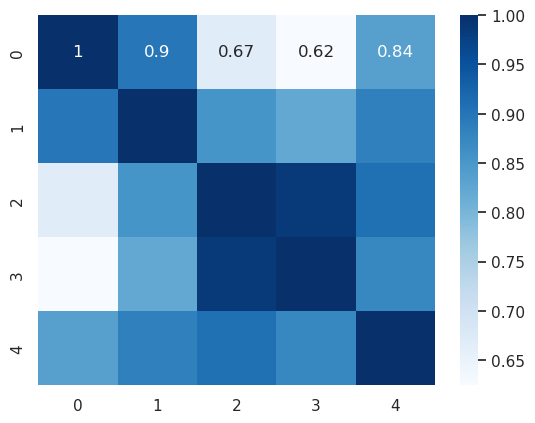

In [4]:
number_of_features_cluster_1 = 5
cluster1 = generate_correlated_cluster(number_of_features=number_of_features_cluster_1, number_of_samples=number_of_samples_per_class, lower_bound=0.7, upper_bound=1.0)

generation of correlation matrix ...


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/statsmodels/stats/correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


generation of covariant matrix ...


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/statsmodels/stats/correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


generation of covariant matrix finished
generation of correlated cluster finished


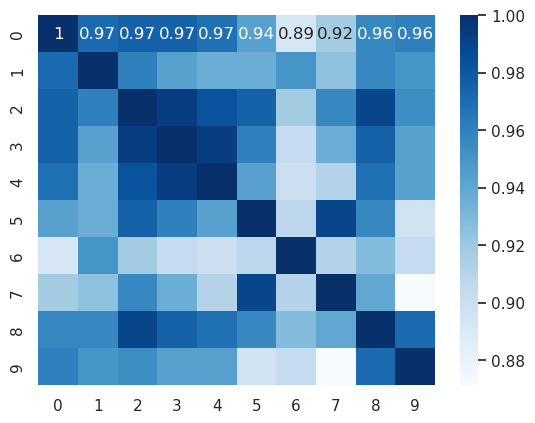

In [5]:
number_of_features_cluster_2 = 10
cluster2 = generate_correlated_cluster(number_of_features=number_of_features_cluster_2, number_of_samples=number_of_samples_per_class, lower_bound=0.9, upper_bound=1.0)

In [6]:
import math
import warnings

def generate_normal_distributed_class(scale, number_of_samples, number_of_normal_distributed_relevant_features: int) -> ndarray:

    # generate normal distributed random data
    if number_of_normal_distributed_relevant_features > 0:
        rng = np.random.default_rng()
        relevant_features = rng.normal(
            loc=0,
            scale=scale,
            size=(number_of_samples, number_of_normal_distributed_relevant_features),
        )

        if not math.isclose(np.mean(relevant_features), 0, abs_tol=0.15):
            warnings.warn(
                f"mean of generated data {str(np.mean(relevant_features))} differs from expected mean {str(0)} "
                f"-> Try choosing a smaller scale for a small sample size or accept a deviating mean. "
                f"The current scale is {str(scale)}."
            )
        class_features_list.append(relevant_features)

    complete_class_np = np.concatenate(class_features_list, axis=1)
    print(complete_class_np.shape)
    assert complete_class_np.shape == (number_of_samples, number_of_relevant_features)
    data_df = pd.DataFrame(complete_class_np.flatten(), columns=["class"])
    sns.histplot(data=data_df)
    return complete_class_np

(15, 30)


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

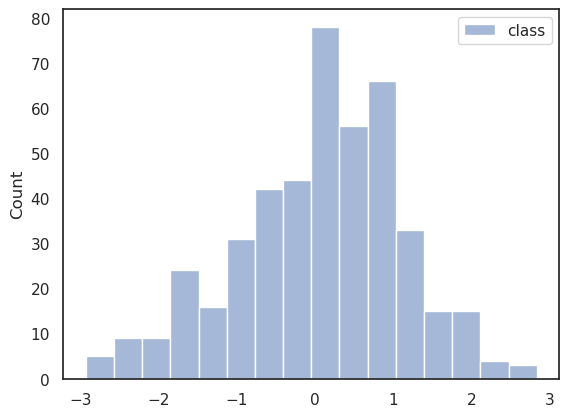

In [7]:
number_of_normal_distributed_relevant_features = number_of_relevant_features - number_of_features_cluster_1 - number_of_features_cluster_2
assert number_of_normal_distributed_relevant_features > 0
class_features_list = []
class_features_list.append(cluster1)
class_features_list.append(cluster2)
normal_distributed_class1_np = generate_normal_distributed_class(scale=1, number_of_samples=number_of_samples_per_class, number_of_normal_distributed_relevant_features=number_of_normal_distributed_relevant_features)

(15, 30)


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

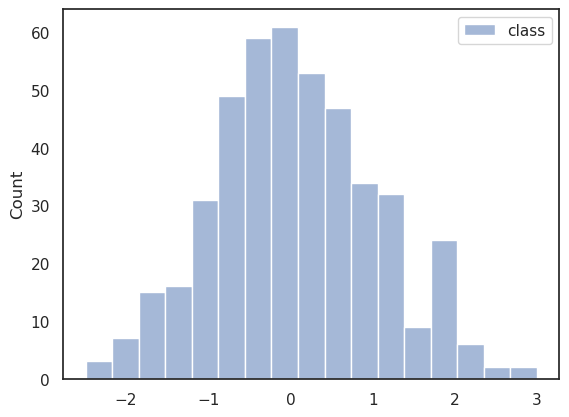

In [8]:
number_of_normal_distributed_relevant_features = number_of_relevant_features
class_features_list = []
normal_distributed_class2_np = generate_normal_distributed_class(scale=1, number_of_samples=number_of_samples_per_class, number_of_normal_distributed_relevant_features=number_of_normal_distributed_relevant_features)

In [9]:
# enlarge effectize
effectsize = 1
shifted_class_np = normal_distributed_class2_np + effectsize

/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: ylabel='Count'>

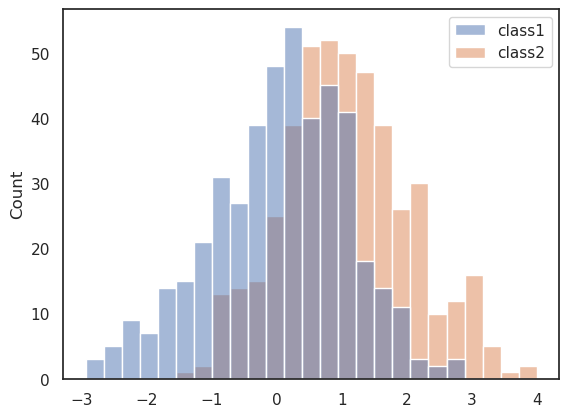

In [10]:
class_plot_pd = pd.DataFrame(normal_distributed_class1_np.flatten(), columns=["class1"])
class_plot_pd["class2"] = shifted_class_np.flatten()
sns.histplot(data=class_plot_pd)


In [11]:
# append label to classes
label_class1 = 1
label_np = np.full((number_of_samples_per_class, 1), fill_value=label_class1)
labeled_data_class1_np = np.concatenate((label_np, normal_distributed_class1_np), axis=1)
label_class2 = 2
label_np = np.full((number_of_samples_per_class, 1), fill_value=label_class2)
labeled_data_class2_np = np.concatenate((label_np, normal_distributed_class2_np), axis=1)

In [12]:
# generate labeled relevant features
relevant_labeled_features_np = np.concatenate([labeled_data_class1_np, labeled_data_class2_np], axis=0)
assert relevant_labeled_features_np.shape[0] == number_of_samples_per_class * 2  # two classes
assert relevant_labeled_features_np.shape[1] == number_of_relevant_features + 1  # the label

In [13]:
# generate randomly shuffled pseudo-class
def build_pseudo_classes() -> ndarray:
    """Create pseudo-classes by shuffling artificial classes.
    The total number of underlying classes equals the total number of artificial classes.
    Returns:
        Randomly shuffled pseudo-class: Numpy array of the given shape.
    """
    rng = np.random.default_rng()
    simulated_classes = []
    number_of_pseudo_class_samples = 0

    # generate normal distributed classes
    for i in range(2):
        normal_distributed_class = rng.normal(
            size=(
                number_of_samples_per_class,
                number_of_pseudo_class_features,
            ),
            loc=4 * i,  # shift random data to generate different classes
            scale=1,
        )
        simulated_classes.append(normal_distributed_class)
    classes = np.concatenate(simulated_classes, axis=0)

    # shuffle classes to finally create pseudo-class
    np.random.shuffle(classes)
    return classes

In [14]:
# append pseudo classes
pseudo_class_np = build_pseudo_classes()
artificial_data_np = np.concatenate([relevant_labeled_features_np, pseudo_class_np], axis=1)

# append random features
random_features_np = np.random.normal(
    loc=0.0,
    scale=2,
    size=(artificial_data_np.shape[0], number_of_random_features),
)
artificial_data_np = np.concatenate([artificial_data_np, random_features_np], axis=1)
assert artificial_data_np.shape[0] == number_of_samples_per_class * 2
assert artificial_data_np.shape[1] == number_of_relevant_features + number_of_pseudo_class_features + number_of_random_features + 1  # the label

In [16]:
# generate pandas dataframe

# generate label as first entry
column_names = ["label"]

# generate feature names
for i in range(number_of_relevant_features):
  column_names.append(f"bm{i}")
for i in range(number_of_pseudo_class_features):
  column_names.append(f"pseudo{i}")
for i in range(number_of_random_features):
  column_names.append(f"random{i}")

data_df = pd.DataFrame(data=artificial_data_np, columns=column_names)
print(data_df.shape)

(30, 241)
